In [2]:
import pandas as pd
import numpy as np

In [3]:
rawData_df = pd.read_json("transaction-data-adhoc-analysis.json")

# Data Cleaning

In [4]:
cleanedData_df = rawData_df.copy()
cleanedData_df['transaction_date'] = pd.to_datetime(rawData_df['transaction_date'])
cleanedData_df['birthdate'] = pd.to_datetime(rawData_df['birthdate'])

cleanedData_df['age'] = round((pd.Timestamp.now() - cleanedData_df['birthdate'])  / np.timedelta64(1, 'Y'))

cleanedData_df['transaction_items'] = cleanedData_df['transaction_items'].apply(lambda x: x.split(';'))
cleanedData_df = cleanedData_df.explode('transaction_items').reset_index(drop=True)

cleanedData_df['transaction_amount'] = cleanedData_df['transaction_items'].apply(lambda x: int(x.split(',')[-1].strip('(x)')))
cleanedData_df['transaction_items'] = cleanedData_df['transaction_items'].apply(lambda x: x.split(',')[0] + '/' + x.split(',')[1])

priceList_df = cleanedData_df[cleanedData_df['transaction_amount']==1].groupby(cleanedData_df['transaction_items'])['transaction_value'].agg(min)

cleanedData_df['transaction_value'] = cleanedData_df['transaction_items'].apply(lambda x: priceList_df[x]) * cleanedData_df['transaction_amount']

In [5]:
priceList_df

transaction_items
Candy City/Gummy Worms               150
Candy City/Orange Beans              199
Exotic Extras/Beef Chicharon        1299
Exotic Extras/Kimchi and Seaweed     799
HealthyKid 3+/Gummy Vitamins        1500
HealthyKid 3+/Nutrional Milk        1990
HealthyKid 3+/Yummy Vegetables       500
Name: transaction_value, dtype: int64

In [6]:
cleanedData_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,age,transaction_amount
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,Exotic Extras/Beef Chicharon,5196,2022-01-12,96.0,4
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Exotic Extras/Beef Chicharon,3897,2022-01-12,6.0,3
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,HealthyKid 3+/Nutrional Milk,7960,2022-01-12,6.0,4
3,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Candy City/Orange Beans,199,2022-01-12,6.0,1
4,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,HealthyKid 3+/Gummy Vitamins,4500,2022-01-08,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,HealthyKid 3+/Nutrional Milk,3980,2022-06-09,109.0,2
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Candy City/Gummy Worms,300,2022-06-09,109.0,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,HealthyKid 3+/Nutrional Milk,1990,2022-06-03,10.0,1
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,Candy City/Gummy Worms,450,2022-06-03,10.0,3


# Item Count Sold Per Month

In [7]:
itemCountPerMonth_df = cleanedData_df[['transaction_items','transaction_value','transaction_date','transaction_amount']].copy()
itemCountPerMonth_df['transaction_month'] = itemCountPerMonth_df['transaction_date'].apply(lambda x: x.month)
itemCountPerMonth_table = pd.pivot_table(itemCountPerMonth_df, index=['transaction_month'], columns=['transaction_items'], values=['transaction_amount'], aggfunc=sum, fill_value=0)

In [8]:
itemCountPerMonth_table

transaction_amount                          \
transaction_items Candy City/Gummy Worms Candy City/Orange Beans   
transaction_month                                                  
1                                   9559                    9774   
2                                   9996                   10037   
3                                   9986                    9611   
4                                  10043                    9914   
5                                   9801                    9964   
6                                   9934                   10106   

                                                \
transaction_items Exotic Extras/Beef Chicharon   
transaction_month                                
1                                         9665   
2                                        10001   
3                                         9816   
4                                         9890   
5                                        10028   
6                                         9902   

                                                    \
transaction_items Exotic Extras/Kimchi and Seaweed   
transaction_month                                    
1                                             9676   
2                                             9949   
3                                             9967   
4                                             9921   
5                                             9773   
6                                            10104   

                                                                             \
transaction_items HealthyKid 3+/Gummy Vitamins HealthyKid 3+/Nutrional Milk   
transaction_month                                                             
1                                         9681                         9727   
2                                         9980                         9691   
3                                        10145                         9876   
4                                         9842                         9786   
5                                         9948                         9881   
6                                         9980                         9767   

                                                  
transaction_items HealthyKid 3+/Yummy Vegetables  
transaction_month                                 
1                                           9959  
2                                          10256  
3                                           9896  
4                                           9861  
5                                           9735  
6                                           9722

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa19311d610>,
      dtype=object)

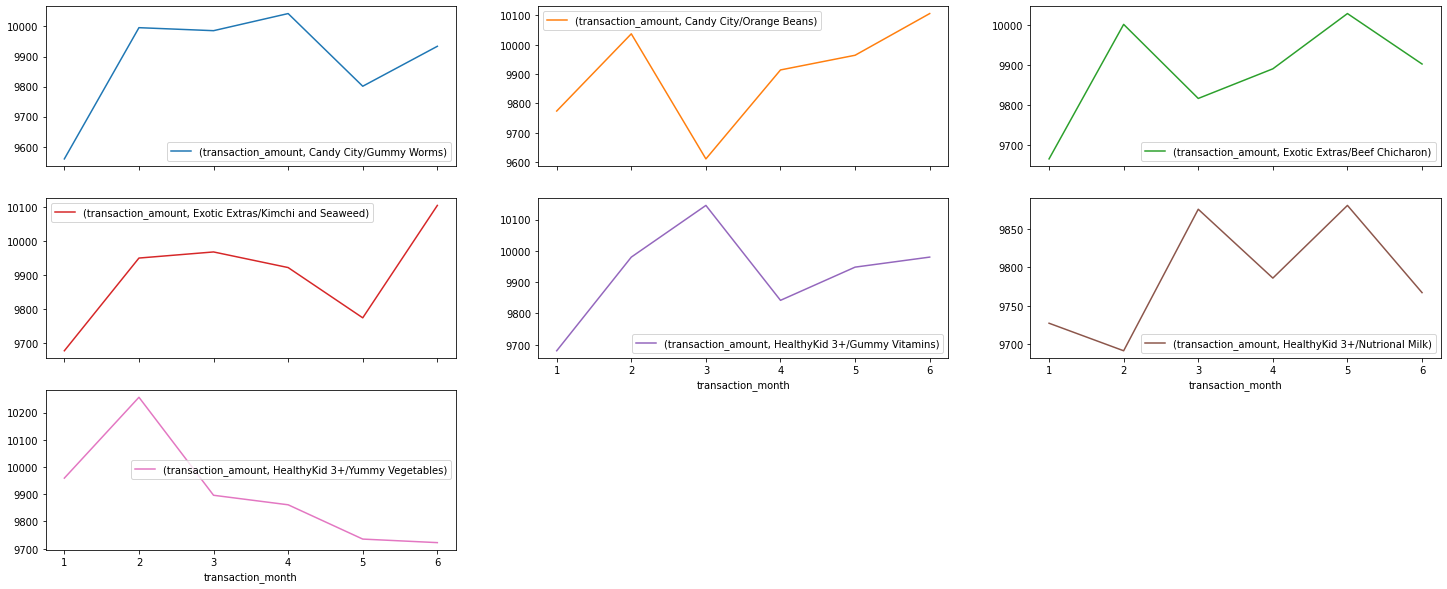

In [9]:
itemCountPerMonth_table.plot(subplots=True, layout=(3,3), figsize=(25,10))

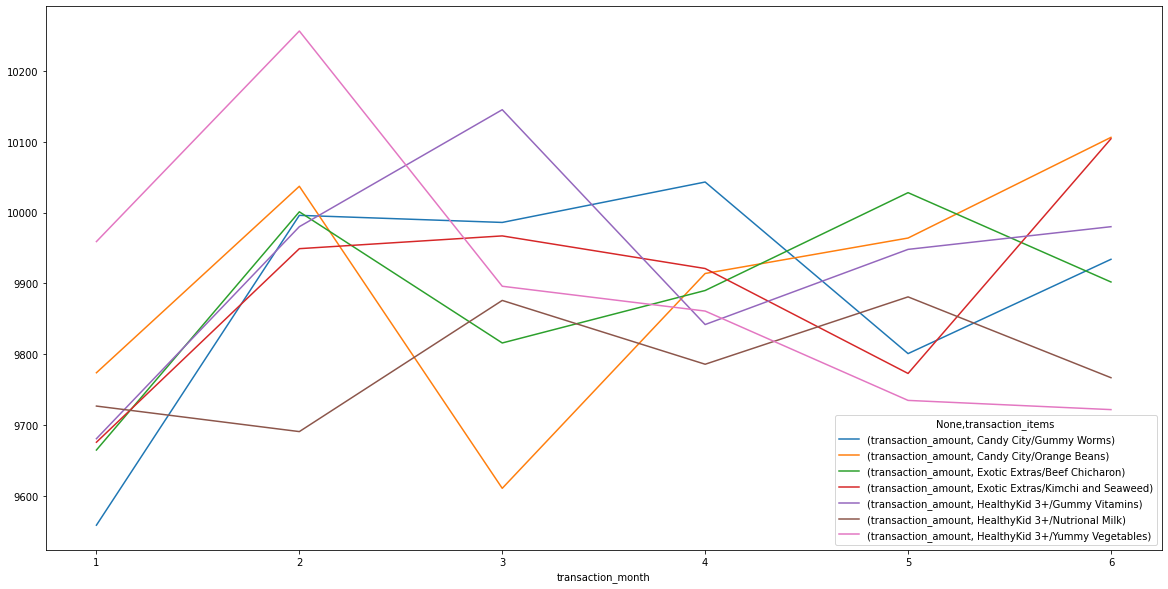

In [10]:
itemCountPerMonth_table.plot.line(figsize=(20,10))

# Sales Value per Item per Month

In [11]:
salesPerItemPerMonth_df = itemCountPerMonth_df.copy()
salesPerItemPerMonth_table = pd.pivot_table(salesPerItemPerMonth_df, index=['transaction_month'], columns=['transaction_items'], values=['transaction_value'], aggfunc=sum, fill_value=0)

In [12]:
salesPerItemPerMonth_table

transaction_value                          \
transaction_items Candy City/Gummy Worms Candy City/Orange Beans   
transaction_month                                                  
1                                1433850                 1945026   
2                                1499400                 1997363   
3                                1497900                 1912589   
4                                1506450                 1972886   
5                                1470150                 1982836   
6                                1490100                 2011094   

                                                \
transaction_items Exotic Extras/Beef Chicharon   
transaction_month                                
1                                     12554835   
2                                     12991299   
3                                     12750984   
4                                     12847110   
5                                     13026372   
6                                     12862698   

                                                    \
transaction_items Exotic Extras/Kimchi and Seaweed   
transaction_month                                    
1                                          7731124   
2                                          7949251   
3                                          7963633   
4                                          7926879   
5                                          7808627   
6                                          8073096   

                                                                             \
transaction_items HealthyKid 3+/Gummy Vitamins HealthyKid 3+/Nutrional Milk   
transaction_month                                                             
1                                     14521500                     19356730   
2                                     14970000                     19285090   
3                                     15217500                     19653240   
4                                     14763000                     19474140   
5                                     14922000                     19663190   
6                                     14970000                     19436330   

                                                  
transaction_items HealthyKid 3+/Yummy Vegetables  
transaction_month                                 
1                                        4979500  
2                                        5128000  
3                                        4948000  
4                                        4930500  
5                                        4867500  
6                                        4861000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa192ef0e50>,
      dtype=object)

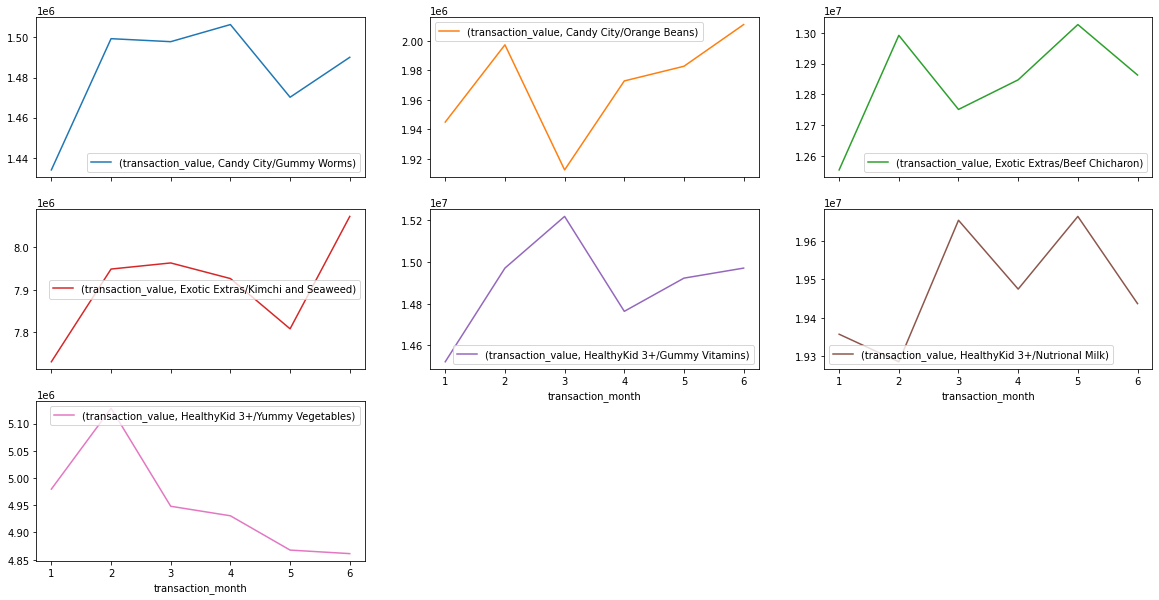

In [13]:
salesPerItemPerMonth_table.plot(subplots=True, layout=(3,3), figsize=(20,10))

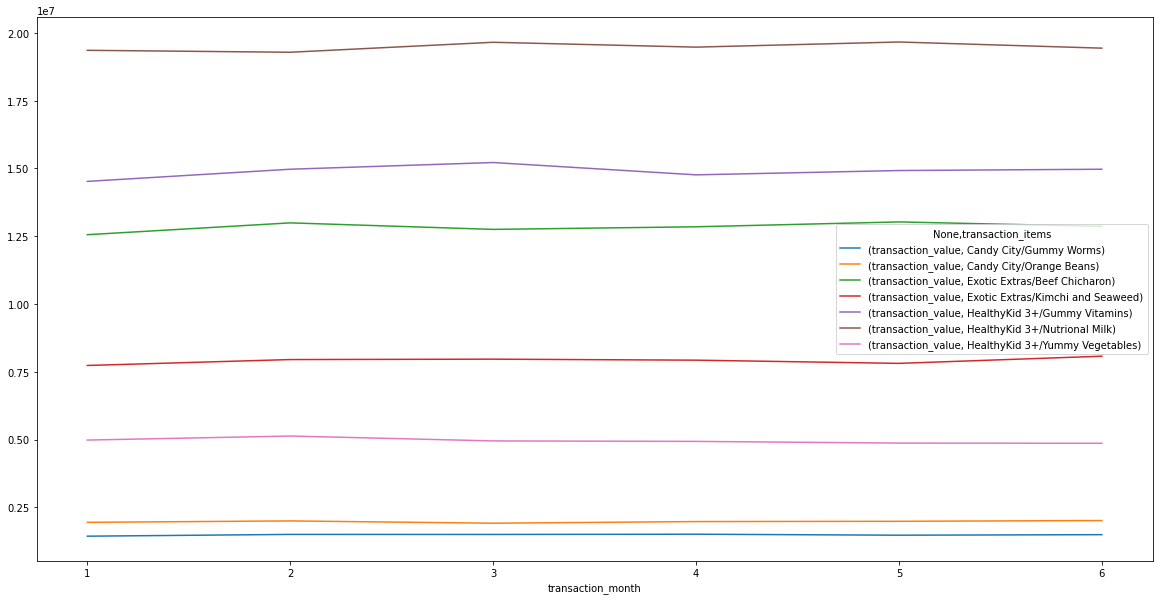

In [14]:
salesPerItemPerMonth_table.plot.line(figsize=(20,10))

# Total Sales per Month

In [15]:
totalSalesPerMonth_df = itemCountPerMonth_df.copy()
totalSalesPerMonth_table = pd.pivot_table(salesPerItemPerMonth_df, index=['transaction_month'], values=['transaction_value'], aggfunc=sum, fill_value=0)

In [16]:
totalSalesPerMonth_table

,transaction_value
transaction_month,
1,62522565
2,63820403
3,63943846
4,63420965
5,63740675
6,63704318


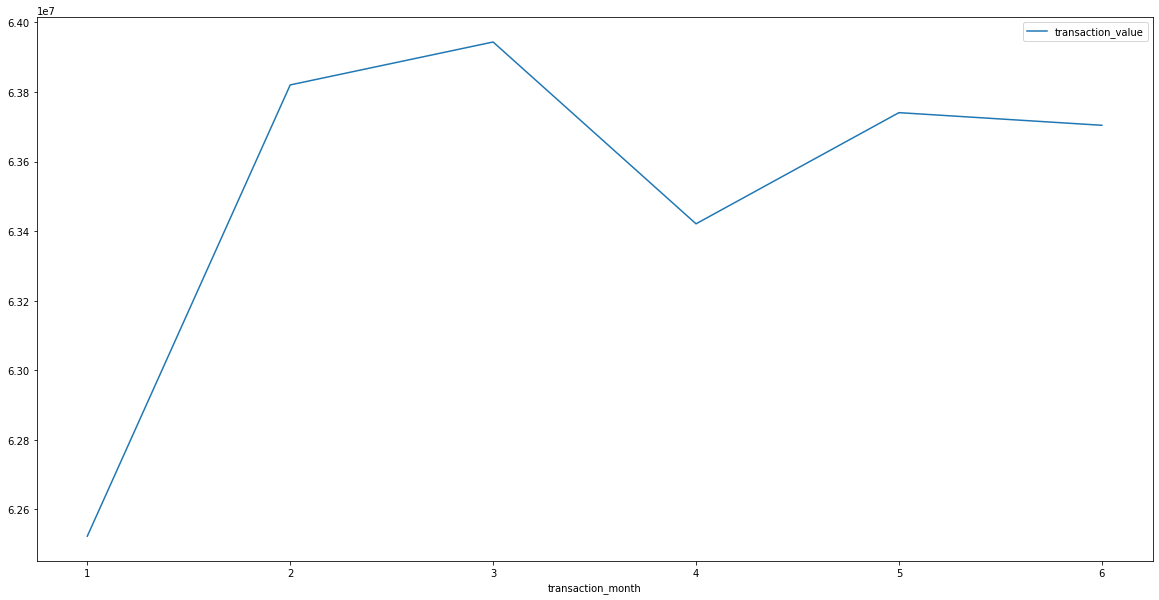

In [17]:
totalSalesPerMonth_table.plot(figsize=(20,10))

# Monthly Repeaters, Inactives, and Engaged

In [18]:
monthlyUsers_df = cleanedData_df[['name','transaction_date']].copy()
monthlyUsers_df['transaction_month'] = monthlyUsers_df['transaction_date'].apply(lambda x: x.month)

monthlyUsers_table = pd.pivot_table(monthlyUsers_df, index=['transaction_month'], columns=['name'], aggfunc=any, fill_value=False)

monthlyUsers_table = pd.DataFrame({
    'repeaters':monthlyUsers_table.apply(lambda x: [False if i==1 else (True if x[i-1] and x[i] else False) for i in x.index]).transpose().sum(),
    'inactive':monthlyUsers_table.apply(lambda x: [False if i==1 else ((True if x[i]==False else False) if any(x[:i]) else False) for i in x.index]).transpose().sum(),
    'engaged':monthlyUsers_table.apply(lambda x: [True if all(x[:i]) else False for i in x.index]).transpose().sum()
  }).transpose()

In [19]:
monthlyUsers_table

transaction_month,1,2,3,4,5,6
repeaters,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190


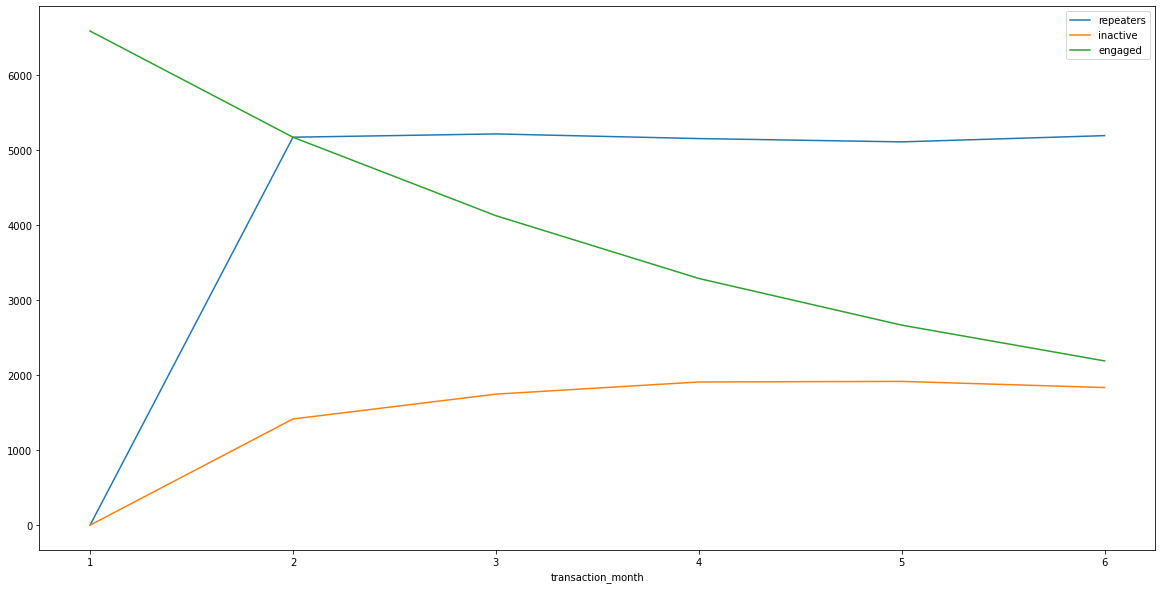

In [20]:
monthlyUsers_table.transpose().plot.line(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa192b13750>],
      dtype=object)

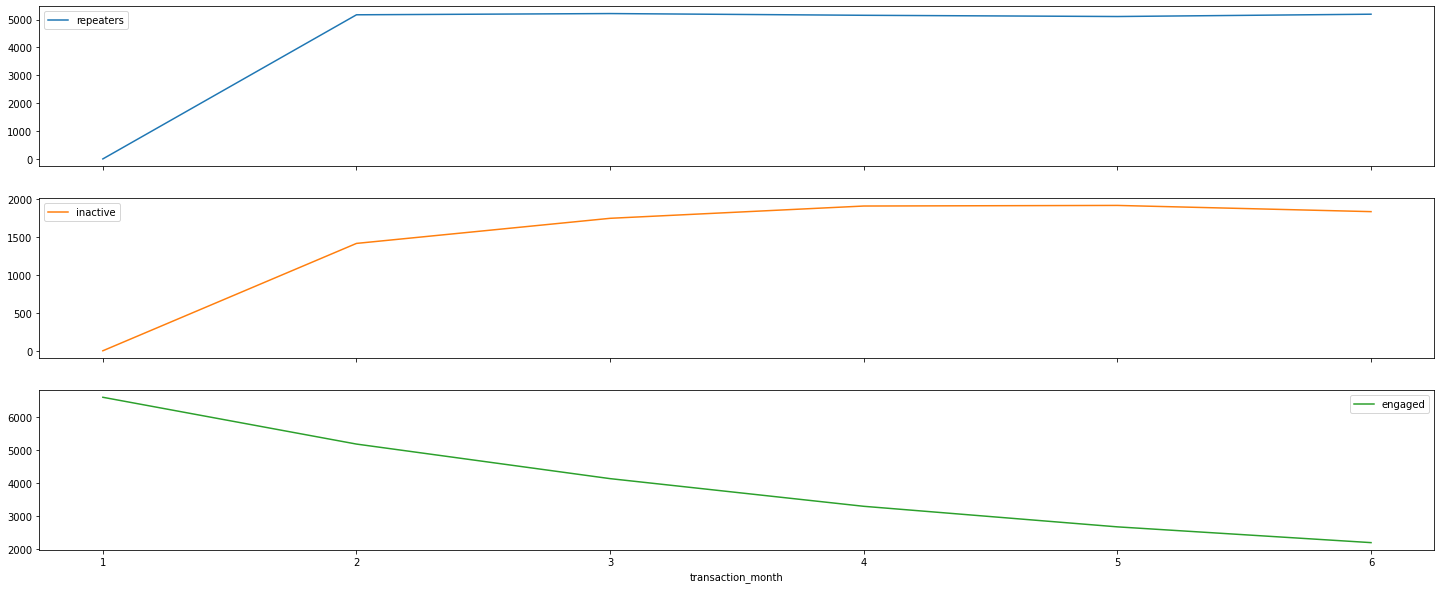

In [21]:
monthlyUsers_table.transpose().plot(subplots=True, layout=(3,1), figsize=(25,10))

# Item Count per Age Group per Month

In [33]:
agePerItemPerMonth_df = cleanedData_df[['transaction_items','transaction_amount','age','transaction_date']].copy()
agePerItemPerMonth_df['transaction_month'] = agePerItemPerMonth_df['transaction_date'].apply(lambda x: x.month)

agePerItemPerMonth_df['age_group'] = agePerItemPerMonth_df['age'].apply(
    lambda x: 'Child' if x<=14 else ('Youth' if 15<=x<=24 else ('Adult' if 25<=x<=64 else 'Senior'))
  )

In [34]:
agePerItemPerMonth_table = pd.pivot_table(agePerItemPerMonth_df, index=['transaction_month'], columns=['age_group','transaction_items'], values=['transaction_amount'], aggfunc=sum, fill_value=0)
agePerItemPerMonth_table.columns = agePerItemPerMonth_table.columns.droplevel()

In [35]:
agePerItemPerMonth_table

age_group                          Adult                          \
transaction_items Candy City/Gummy Worms Candy City/Orange Beans   
transaction_month                                                  
1                                   3237                    3365   
2                                   3322                    3396   
3                                   3397                    3083   
4                                   3391                    3301   
5                                   3207                    3319   
6                                   3222                    3314   

age_group                                       \
transaction_items Exotic Extras/Beef Chicharon   
transaction_month                                
1                                         3219   
2                                         3402   
3                                         3104   
4                                         3449   
5                                         3239   
6                                         3237   

age_group                                           \
transaction_items Exotic Extras/Kimchi and Seaweed   
transaction_month                                    
1                                             3317   
2                                             3309   
3                                             3281   
4                                             3347   
5                                             3255   
6                                             3385   

age_group                                                                    \
transaction_items HealthyKid 3+/Gummy Vitamins HealthyKid 3+/Nutrional Milk   
transaction_month                                                             
1                                         3318                         3296   
2                                         3379                         3181   
3                                         3366                         3266   
4                                         3382                         3260   
5                                         3280                         3232   
6                                         3462                         3250   

age_group                                                         Child  \
transaction_items HealthyKid 3+/Yummy Vegetables Candy City/Gummy Worms   
transaction_month                                                         
1                                           3325                   1159   
2                                           3362                   1316   
3                                           3277                   1213   
4                                           3320                   1228   
5                                           3303                   1312   
6                                           3339                   1273   

age_group                                                               ...  \
transaction_items Candy City/Orange Beans Exotic Extras/Beef Chicharon  ...   
transaction_month                                                       ...   
1                                    1217                         1190  ...   
2                                    1407                         1158  ...   
3                                    1251                         1241  ...   
4                                    1307                         1294  ...   
5                                    1239                         1266  ...   
6                                    1256                         1307  ...   

age_group                               Senior                               \
transaction_items HealthyKid 3+/Gummy Vitamins HealthyKid 3+/Nutrional Milk   
transaction_month                                                             
1                                         4367                         4419   
2                                

In [36]:
agePerItemPerMonth_table['Child']

transaction_items,Candy City/Gummy Worms,Candy City/Orange Beans,Exotic Extras/Beef Chicharon,Exotic Extras/Kimchi and Seaweed,HealthyKid 3+/Gummy Vitamins,HealthyKid 3+/Nutrional Milk,HealthyKid 3+/Yummy Vegetables
transaction_month,,,,,,,
1,1159,1217,1190,1183,1181,1166,1201
2,1316,1407,1158,1293,1254,1300,1307
3,1213,1251,1241,1244,1283,1252,1271
4,1228,1307,1294,1209,1196,1202,1244
5,1312,1239,1266,1229,1271,1318,1249
6,1273,1256,1307,1272,1271,1229,1132


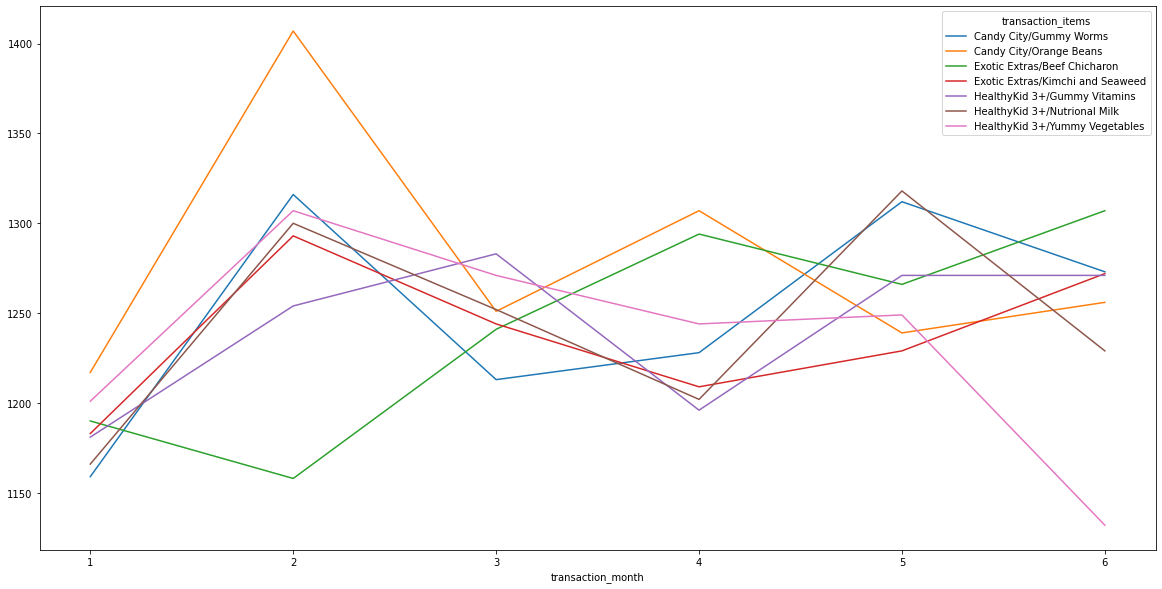

In [37]:
agePerItemPerMonth_table['Child'].plot(figsize=(20,10))

In [38]:
agePerItemPerMonth_table['Youth']

transaction_items,Candy City/Gummy Worms,Candy City/Orange Beans,Exotic Extras/Beef Chicharon,Exotic Extras/Kimchi and Seaweed,HealthyKid 3+/Gummy Vitamins,HealthyKid 3+/Nutrional Milk,HealthyKid 3+/Yummy Vegetables
transaction_month,,,,,,,
1,734,848,752,816,815,846,840
2,961,822,841,882,858,819,882
3,870,846,926,875,910,837,849
4,906,968,843,947,839,805,891
5,811,934,841,813,853,894,854
6,887,955,884,939,804,841,868


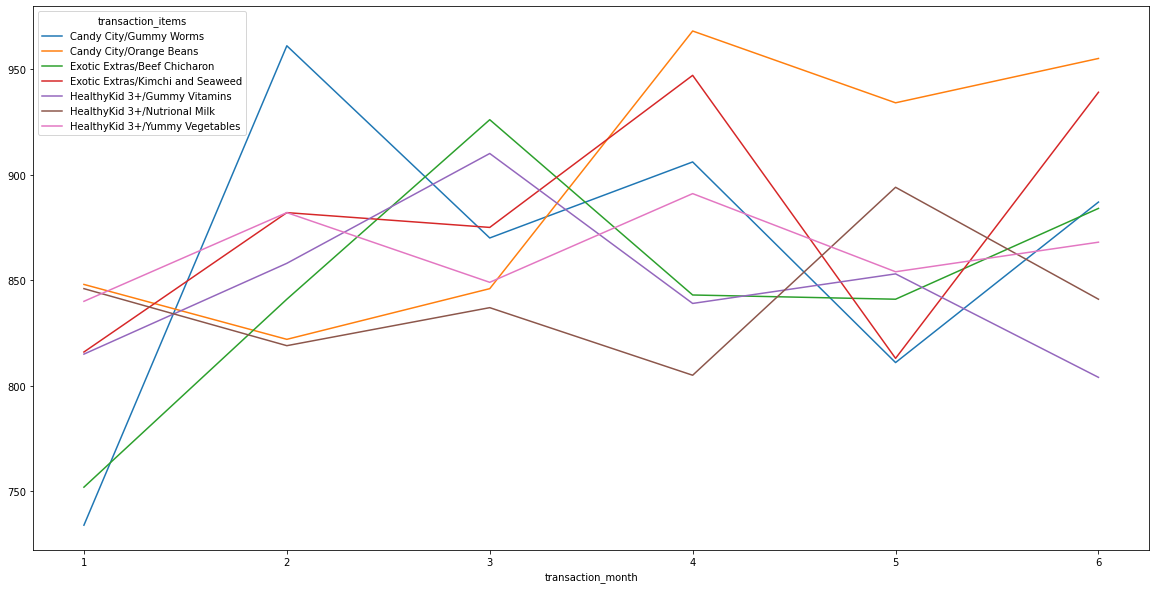

In [39]:
agePerItemPerMonth_table['Youth'].plot(figsize=(20,10))

In [40]:
agePerItemPerMonth_table['Adult']

transaction_items,Candy City/Gummy Worms,Candy City/Orange Beans,Exotic Extras/Beef Chicharon,Exotic Extras/Kimchi and Seaweed,HealthyKid 3+/Gummy Vitamins,HealthyKid 3+/Nutrional Milk,HealthyKid 3+/Yummy Vegetables
transaction_month,,,,,,,
1,3237,3365,3219,3317,3318,3296,3325
2,3322,3396,3402,3309,3379,3181,3362
3,3397,3083,3104,3281,3366,3266,3277
4,3391,3301,3449,3347,3382,3260,3320
5,3207,3319,3239,3255,3280,3232,3303
6,3222,3314,3237,3385,3462,3250,3339


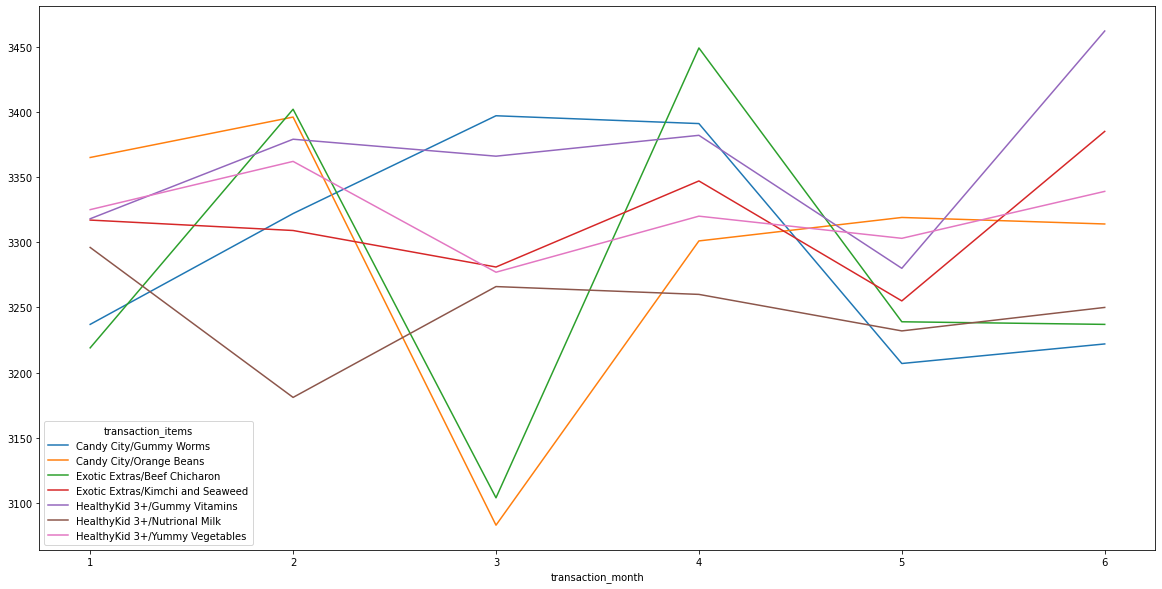

In [41]:
agePerItemPerMonth_table['Adult'].plot(figsize=(20,10))

In [42]:
agePerItemPerMonth_table['Senior']

transaction_items,Candy City/Gummy Worms,Candy City/Orange Beans,Exotic Extras/Beef Chicharon,Exotic Extras/Kimchi and Seaweed,HealthyKid 3+/Gummy Vitamins,HealthyKid 3+/Nutrional Milk,HealthyKid 3+/Yummy Vegetables
transaction_month,,,,,,,
1,4429,4344,4504,4360,4367,4419,4593
2,4397,4412,4600,4465,4489,4391,4705
3,4506,4431,4545,4567,4586,4521,4499
4,4518,4338,4304,4418,4425,4519,4406
5,4471,4472,4682,4476,4544,4437,4329
6,4552,4581,4474,4508,4443,4447,4383


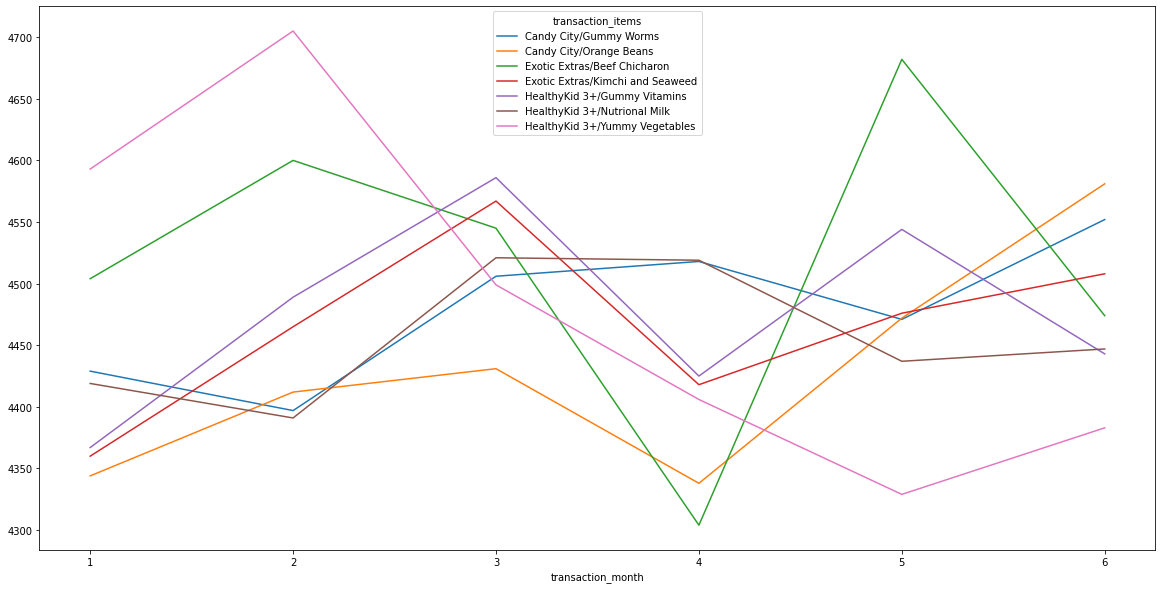

In [44]:
agePerItemPerMonth_table['Senior'].plot(figsize=(20,10))